# Team Project 1
## DS160-01
### AUTHORS: Naat Ambrosino and Jardin Dantzler
### VERSION: 1
### SEMESTER: Spring 2022
### SUMMARY:
#### We developed this notebook to....

#### Pre-work (cleaning up dataset in general)

In [84]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import pylab 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [85]:
df=pd.read_csv('Canada_Hosp1_COVID_Data_At_Admission.csv')
dfj=pd.read_csv('Canada_Hosp1_COVID_Data_At_Admission.csv')
#created second identical dataframe due to some issues created
#by pushing/pulling mistakes, so that we don't have to keep fixing previous
#entries.

In [86]:
df

,id,reason_for_admission,age,sex,ethnicity,ethnicity_other,height,weight,comorbidities,comorbidities_other,...,pao2,pao2_fio2,ph,high_senstivity_cardiac_troponin,esr,inr,ferritin,d_dimer,crp,hs_crp
0,1,Fever [R50.9],74,Male,"""[]""",NaN,NaN,NaN,"""[\""Hypertension\"",\""Diabetes\"",\""Other\""]""","GERD (gastroesophageal reflux disease), Dement...",...,NaN,NaN,NaN,NaN,NaN,1.1,NaN,NaN,223.0,NaN
1,2,Pneumonia [J18.9],61,Female,"""[]""",NaN,154.9,73.6,"""[\""Hypertension\"",\""Other\""]""","Closed fracture of fifth metatarsal bone, Dive...",...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2354,95.6,NaN
2,3,Pneumonia [J18.9],58,Female,"""[]""",NaN,NaN,NaN,"""[\""Hypertension\""]""",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Suspected COVID-19 virus infection [U07.2],94,Male,"""[]""",NaN,182.8,66.2,"""[\""Hypertension\"",\""Other\""]""","Parkinson's Disease, Back pain, Benign Prostat...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,"Febrile respiratory illness [J98.9, R50.9]",91,Male,"""[]""",NaN,NaN,NaN,"""[\""Chronic cardiac disease (not hypertension)...","TAVI, Atrial fibrillation, Gastric Reflux, Pac...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,516,Shortness of breath [R06.0],74,Female,"""[]""",NaN,NaN,55.0,"""[\""Other\""]""","Arthritis, High cholesterol, Hypothyroidism, V...",...,NaN,NaN,NaN,NaN,NaN,1.1,NaN,NaN,NaN,NaN
504,517,COVID-19 [U07.1],81,Male,"""[]""",NaN,158.0,65.0,"""[\""Hypertension\"",\""Chronic renal\"",\""Diabete...","GERD (gastroesophageal reflux disease), High c...",...,76.0,1.5,7.44,NaN,NaN,NaN,NaN,>4000,NaN,NaN
505,519,COVID-19 [U07.1],74,Male,"""[]""",NaN,NaN,81.7,"""[\""Hypertension\"",\""Other\""]""","Dermatitis, Hyponatremia, Irritable bowel synd...",...,NaN,NaN,NaN,NaN,NaN,1.5,NaN,NaN,NaN,NaN
506,521,COVID-19 [U07.1],48,Female,"""[]""",NaN,180.0,95.3,"""[]""",NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,428,NaN,NaN


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                508 non-null    int64  
 1   reason_for_admission              508 non-null    object 
 2   age                               508 non-null    int64  
 3   sex                               508 non-null    object 
 4   ethnicity                         508 non-null    object 
 5   ethnicity_other                   0 non-null      float64
 6   height                            272 non-null    float64
 7   weight                            358 non-null    float64
 8   comorbidities                     508 non-null    object 
 9   comorbidities_other               404 non-null    object 
 10  received_covid_vaccine            1 non-null      object 
 11  covid_vaccine                     0 non-null      float64
 12  medicati

Dropping ID as it is just a alternative index (and skips values, its intended to be used to reference a single patient across the different datasets but since we are only using the Data At Admission dataset, the ID column is obsolete), along with the columns that are empty or nearly empty (<=40 non-null values.) We will decide on other columns with much missing data later.

In [88]:
df.columns

Index(['id', 'reason_for_admission', 'age', 'sex', 'ethnicity',
       'ethnicity_other', 'height', 'weight', 'comorbidities',
       'comorbidities_other', 'received_covid_vaccine', 'covid_vaccine',
       'medications', 'smoking_history', 'year_they_quit',
       'previous_er_visit_within_14_days', 'admission_disposition',
       'systolic_blood_pressure', 'diastolic_blood_pressure', 'heart_rate',
       'respiratory_rate', 'oxygen_saturation', 'temperature', 'motor',
       'verbal', 'eye', 'intubated', 'wbc', 'rbc', 'hemoglobin', 'hematocrit',
       'mcv', 'mch', 'mchc', 'rdw', 'platelet_count', 'aptt_aptr', 'pt', 'alt',
       'ast', 'serum_creatinine', 'sodium', 'potassium',
       'total_serum_bilirubin', 'lactate', 'pao2', 'pao2_fio2', 'ph',
       'high_senstivity_cardiac_troponin', 'esr', 'inr', 'ferritin', 'd_dimer',
       'crp', 'hs_crp'],
      dtype='object')

In [89]:
df.drop(['id','ethnicity_other','received_covid_vaccine', 'covid_vaccine',
        'pao2', 'pao2_fio2', 'ph',
       'high_senstivity_cardiac_troponin', 'esr','ferritin','hs_crp'],
       axis=1, inplace=True)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   reason_for_admission              508 non-null    object 
 1   age                               508 non-null    int64  
 2   sex                               508 non-null    object 
 3   ethnicity                         508 non-null    object 
 4   height                            272 non-null    float64
 5   weight                            358 non-null    float64
 6   comorbidities                     508 non-null    object 
 7   comorbidities_other               404 non-null    object 
 8   medications                       508 non-null    object 
 9   smoking_history                   296 non-null    object 
 10  year_they_quit                    43 non-null     float64
 11  previous_er_visit_within_14_days  508 non-null    object 
 12  admissio

Noticed earlier that ethnicity seems to have a lot of (if not completely comprised of) "[]" values, and on the website there seemed to be an off value in the sex column. Going to check both of them using .groupby().count to see if we should keep ethnicity at all and whether theres a typo in sex.

In [91]:
df.ethnicity.groupby(df.ethnicity).count()

ethnicity
"[]"    508
Name: ethnicity, dtype: int64

Ethnicity column has no actual values for all intents and purposes. Dropping.

In [92]:
df.drop(['ethnicity'],axis=1,inplace=True)

In [93]:
df.sex.groupby(df.sex).count()

sex
Female    212
Male      296
Name: sex, dtype: int64

Does not appear to be a typo in sex. Good! Now checking how many columns we still have, along with their datatypes.

In [94]:
len(df.columns)

43

In [95]:
df.head()

,reason_for_admission,age,sex,height,weight,comorbidities,comorbidities_other,medications,smoking_history,year_they_quit,...,alt,ast,serum_creatinine,sodium,potassium,total_serum_bilirubin,lactate,inr,d_dimer,crp
0,Fever [R50.9],74,Male,NaN,NaN,"""[\""Hypertension\"",\""Diabetes\"",\""Other\""]""","GERD (gastroesophageal reflux disease), Dement...","""[{\""medications\"":\""TYLENOL EXTRA STRENGTH\"",...",NaN,NaN,...,53.0,49.0,165.0,135.0,3.9,10.0,2.3,1.1,NaN,223.0
1,Pneumonia [J18.9],61,Female,154.9,73.6,"""[\""Hypertension\"",\""Other\""]""","Closed fracture of fifth metatarsal bone, Dive...","""[{\""medications\"":\""CANDESARTAN\"",\""dosage\"":...",NaN,NaN,...,68.0,68.0,49.0,137.0,3.8,12.0,1.5,1.0,2354,95.6
2,Pneumonia [J18.9],58,Female,NaN,NaN,"""[\""Hypertension\""]""",NaN,"""[{\""medications\"":\""\"",\""dosage\"":\""\"",\""freq...",NaN,NaN,...,52.0,76.0,71.0,135.0,3.7,7.0,1.0,NaN,NaN,NaN
3,Suspected COVID-19 virus infection [U07.2],94,Male,182.8,66.2,"""[\""Hypertension\"",\""Other\""]""","Parkinson's Disease, Back pain, Benign Prostat...","""[{\""medications\"":\""ACETYLSALICYLIC ACID TAB...",NaN,NaN,...,6.0,24.0,146.0,135.0,2.8,10.0,4.5,NaN,NaN,NaN
4,"Febrile respiratory illness [J98.9, R50.9]",91,Male,NaN,NaN,"""[\""Chronic cardiac disease (not hypertension)...","TAVI, Atrial fibrillation, Gastric Reflux, Pac...","""[{\""medications\"":\""TRAZODONE\"",\""dosage\"":\""...",Ex-smoker,NaN,...,17.0,26.0,109.0,142.0,3.8,19.0,3.2,NaN,NaN,NaN


In [96]:
df.dtypes

reason_for_admission                 object
age                                   int64
sex                                  object
height                              float64
weight                              float64
comorbidities                        object
comorbidities_other                  object
medications                          object
smoking_history                      object
year_they_quit                      float64
previous_er_visit_within_14_days     object
admission_disposition                object
systolic_blood_pressure               int64
diastolic_blood_pressure              int64
heart_rate                            int64
respiratory_rate                      int64
oxygen_saturation                     int64
temperature                         float64
motor                               float64
verbal                              float64
eye                                 float64
intubated                            object
wbc                             

Going to get the pairwise correlation table just to see if theres anything that immmediately stands out at this stage.

In [97]:
df.corr()

,age,height,weight,year_they_quit,systolic_blood_pressure,diastolic_blood_pressure,heart_rate,respiratory_rate,oxygen_saturation,temperature,...,pt,alt,ast,serum_creatinine,sodium,potassium,total_serum_bilirubin,lactate,inr,crp
age,1.000000,-0.270279,-0.377498,-0.343756,0.069945,-0.171599,-0.347154,-0.145326,-0.030766,-0.024273,...,0.121951,-0.163725,-0.011269,0.158276,0.168237,0.186950,0.134210,0.124115,0.105539,-0.096656
height,-0.270279,1.000000,0.467210,-0.022039,0.024319,0.099043,0.141969,0.011598,0.007100,0.051773,...,0.199803,0.121294,0.101476,0.040418,-0.001297,0.140092,0.203312,0.123085,0.200931,0.103205
weight,-0.377498,0.467210,1.000000,-0.100169,-0.006880,0.079176,0.098641,0.078056,-0.087124,0.054604,...,0.028663,-0.001842,-0.028792,-0.010503,-0.059378,-0.002744,0.051082,0.042740,0.022127,0.271309
year_they_quit,-0.343756,-0.022039,-0.100169,1.000000,0.075185,0.242800,0.172657,0.157459,-0.377551,0.002955,...,-0.176305,-0.011995,0.051852,-0.046996,-0.148895,0.015586,0.104789,0.223867,-0.173659,-0.491629
systolic_blood_pressure,0.069945,0.024319,-0.006880,0.075185,1.000000,0.567449,0.126706,0.113850,0.019313,0.087001,...,-0.019106,-0.004266,0.002675,0.022953,-0.108161,0.034805,0.011347,0.041900,-0.012608,-0.005780
diastolic_blood_pressure,-0.171599,0.099043,0.079176,0.242800,0.567449,1.000000,0.288724,0.121301,0.100811,0.005300,...,-0.026929,0.043448,-0.006840,-0.044403,-0.013462,0.039455,0.025469,0.051104,-0.019948,-0.160041
heart_rate,-0.347154,0.141969,0.098641,0.172657,0.126706,0.288724,1.000000,0.281794,-0.110209,0.205067,...,-0.054262,0.104361,0.020194,-0.107036,-0.005217,-0.109494,-0.009321,0.151708,-0.051685,0.061270
respiratory_rate,-0.145326,0.011598,0.078056,0.157459,0.113850,0.121301,0.281794,1.000000,-0.292778,0.123891,...,0.004878,0.102044,0.065757,-0.046695,-0.018047,-0.065051,0.128252,0.244511,0.005740,0.398590
oxygen_saturation,-0.030766,0.007100,-0.087124,-0.377551,0.019313,0.100811,-0.110209,-0.292778,1.000000,0.032976,...,-0.057442,-0.014962,-0.075452,0.044824,0.074685,0.072773,-0.110496,-0.312522,-0.043497,-0.293848
temperature,-0.024273,0.051773,0.054604,0.002955,0.087001,0.005300,0.205067,0.123891,0.032976,1.000000,...,-0.074575,-0.013911,-0.052316,0.035265,-0.054681,-0.110988,-0.076264,-0.164282,-0.082416,-0.093513


Well, it seems like most things are very weakly correlated, but there is a correlation coefficient of .996 between inr and pt.  Theres a .8 between alt and ast.  Those might be worth looking into. Surprisingly it seems like age does not have a correlation with an absolute value more than .5, which is noteable and might be worth looking at via pair plots.

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   reason_for_admission              508 non-null    object 
 1   age                               508 non-null    int64  
 2   sex                               508 non-null    object 
 3   height                            272 non-null    float64
 4   weight                            358 non-null    float64
 5   comorbidities                     508 non-null    object 
 6   comorbidities_other               404 non-null    object 
 7   medications                       508 non-null    object 
 8   smoking_history                   296 non-null    object 
 9   year_they_quit                    43 non-null     float64
 10  previous_er_visit_within_14_days  508 non-null    object 
 11  admission_disposition             508 non-null    object 
 12  systolic

I'm going to look through the of categorical variable columns and drop them if they don't seem useful, edit them if they're messy/hard to work with, or just leave them be. I'll also look through the continuous variables directly related to them, if any (ie, year_they_quit is directly related to smoking_history).  

In [99]:
df.reason_for_admission

0                                   Fever [R50.9]
1                               Pneumonia [J18.9]
2                               Pneumonia [J18.9]
3      Suspected COVID-19 virus infection [U07.2]
4      Febrile respiratory illness [J98.9, R50.9]
                          ...                    
503                   Shortness of breath [R06.0]
504                              COVID-19 [U07.1]
505                              COVID-19 [U07.1]
506                              COVID-19 [U07.1]
507                              COVID-19 [U07.1]
Name: reason_for_admission, Length: 508, dtype: object

In [100]:
df.reason_for_admission.groupby(df.reason_for_admission).count()

reason_for_admission
ARDS (adult respiratory distress syndrome) [J80]                        1
Acquired respiratory distress syndrome [J80]                            1
Atypical pneumonia [J18.9]                                              2
COVID-19 [U07.1]                                                      217
COVID-19 determined by clinical diagnostic criteria [U07.2]             1
COVID-19 virus infection [U07.1]                                        2
COVID-19 with multiple comorbidities [U07.1]                            1
Coronavirus infection [B34.2]                                           2
Cough [R05]                                                             2
Febrile respiratory illness [J98.9, R50.9]                              7
Fever [R50.9]                                                          21
Fever of unknown origin [R50.9]                                         1
Hypoxemia [R09.0]                                                       1
Hypoxia [R09.0]  

Reason for admission column has some values that are identical in meaning but use slightly different wording. For example, one observation has the value "Fever of unknown origin [R50.9]" and is thus counted seperately from the 21 observations with the entry "Fever [R50.9]". So, we decided to streamline the values so that if two values are represented by the same code(s) or combination of codes, they will be identical.

In [101]:
def streamReason(x):
    if '[J80]' in x:
        return 'Acute respiratory distress syndrome'
        #Note: After some research, I found Acquired rds and Adult rds both are alternate names for acute rds, so I used acute instead of acquired or adult.
    elif '[J18.9]' in x:
        return 'Pneumonia'
    elif '[U07.1]' in x:
        return 'COVID-19'
    elif '[U07.2]' in x:
        return 'Probable COVID-19'
    elif '[B34.2]' in x:
        return 'Coronavirus infection'
    elif '[R05]' in x:
        return 'Cough'
    elif '[J98.9, R50.9]' in x:
        return 'Febrile respiratory illness'
    elif '[R50.9]' in x:
        return 'Fever'
    elif '[R09.0]' in x:
        return 'Hypoxemia'
    elif '[M79.19]' in x:
        return 'Myalgia'
    elif '[U07.1, J12.8]' in x:
        return 'Pneumonia due to COVID-19 virus'
    elif '[R06.0]' in x:
        return 'Shortness of breath'
    elif '[R06.0, U07.2]' in x:
        return 'Shortness of breath with exposure to COVID-19 virus'
    elif '[R06.8]' in x:
        return 'Tachypnea'
    elif '[J12.9]' in x:
        return 'Viral pneumonia'
    elif '[J96.99]' in x:
        return 'Respiratory failure'
    elif '[J98.8]' in x:
        return 'Respiratory tract infection'
    else: 
        return x


In [102]:
#checking if the function works
streamReason('COVID-19 with multiple comorbidities [U07.1]')
#It seems to!

'COVID-19'

In [103]:
#dataframe['column to put new values in']=list(map(lambda x: functionToApply(x),dataframe['column for function to reference']))

In [104]:
df['reason_for_admission']=list(map(lambda x: streamReason(x),df['reason_for_admission']))

In [105]:
df

,reason_for_admission,age,sex,height,weight,comorbidities,comorbidities_other,medications,smoking_history,year_they_quit,...,alt,ast,serum_creatinine,sodium,potassium,total_serum_bilirubin,lactate,inr,d_dimer,crp
0,Fever,74,Male,NaN,NaN,"""[\""Hypertension\"",\""Diabetes\"",\""Other\""]""","GERD (gastroesophageal reflux disease), Dement...","""[{\""medications\"":\""TYLENOL EXTRA STRENGTH\"",...",NaN,NaN,...,53.0,49.0,165.0,135.0,3.9,10.0,2.3,1.1,NaN,223.0
1,Pneumonia,61,Female,154.9,73.6,"""[\""Hypertension\"",\""Other\""]""","Closed fracture of fifth metatarsal bone, Dive...","""[{\""medications\"":\""CANDESARTAN\"",\""dosage\"":...",NaN,NaN,...,68.0,68.0,49.0,137.0,3.8,12.0,1.5,1.0,2354,95.6
2,Pneumonia,58,Female,NaN,NaN,"""[\""Hypertension\""]""",NaN,"""[{\""medications\"":\""\"",\""dosage\"":\""\"",\""freq...",NaN,NaN,...,52.0,76.0,71.0,135.0,3.7,7.0,1.0,NaN,NaN,NaN
3,Probable COVID-19,94,Male,182.8,66.2,"""[\""Hypertension\"",\""Other\""]""","Parkinson's Disease, Back pain, Benign Prostat...","""[{\""medications\"":\""ACETYLSALICYLIC ACID TAB...",NaN,NaN,...,6.0,24.0,146.0,135.0,2.8,10.0,4.5,NaN,NaN,NaN
4,Febrile respiratory illness,91,Male,NaN,NaN,"""[\""Chronic cardiac disease (not hypertension)...","TAVI, Atrial fibrillation, Gastric Reflux, Pac...","""[{\""medications\"":\""TRAZODONE\"",\""dosage\"":\""...",Ex-smoker,NaN,...,17.0,26.0,109.0,142.0,3.8,19.0,3.2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,Shortness of breath,74,Female,NaN,55.0,"""[\""Other\""]""","Arthritis, High cholesterol, Hypothyroidism, V...","""[{\""medications\"":\""TYLENOL\"",\""dosage\"":\""32...",Non-smoker,NaN,...,30.0,41.0,72.0,131.0,4.1,10.0,2.3,1.1,NaN,NaN
504,COVID-19,81,Male,158.0,65.0,"""[\""Hypertension\"",\""Chronic renal\"",\""Diabete...","GERD (gastroesophageal reflux disease), High c...","""[{\""medications\"":\""SYNTHROID\"",\""dosage\"":\""...",NaN,NaN,...,107.0,70.0,148.0,135.0,4.2,11.0,3.7,NaN,>4000,NaN
505,COVID-19,74,Male,NaN,81.7,"""[\""Hypertension\"",\""Other\""]""","Dermatitis, Hyponatremia, Irritable bowel synd...","""[{\""medications\"":\""XANAX\"",\""dosage\"":\""1\"",...",Non-smoker,NaN,...,16.0,54.0,77.0,134.0,3.8,9.0,NaN,1.5,NaN,NaN
506,COVID-19,48,Female,180.0,95.3,"""[]""",NaN,"""[]""",NaN,NaN,...,18.0,33.0,78.0,133.0,3.9,11.0,1.4,1.0,428,NaN


In [106]:
df.reason_for_admission.groupby(df.reason_for_admission).count()

reason_for_admission
Acute respiratory distress syndrome                      2
COVID-19                                               220
Coronavirus infection                                    2
Cough                                                    2
Febrile respiratory illness                              7
Fever                                                   22
Hypoxemia                                               22
Myalgia                                                  1
Pneumonia                                              136
Pneumonia due to COVID-19 virus                         41
Probable COVID-19                                        8
Respiratory failure                                      7
Respiratory tract infection                              1
Shortness of breath                                     34
Shortness of breath with exposure to COVID-19 virus      1
Tachypnea                                                1
Viral pneumonia                    

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   reason_for_admission              508 non-null    object 
 1   age                               508 non-null    int64  
 2   sex                               508 non-null    object 
 3   height                            272 non-null    float64
 4   weight                            358 non-null    float64
 5   comorbidities                     508 non-null    object 
 6   comorbidities_other               404 non-null    object 
 7   medications                       508 non-null    object 
 8   smoking_history                   296 non-null    object 
 9   year_they_quit                    43 non-null     float64
 10  previous_er_visit_within_14_days  508 non-null    object 
 11  admission_disposition             508 non-null    object 
 12  systolic

In [108]:
df.sex.describe()

count      508
unique       2
top       Male
freq       296
Name: sex, dtype: object

In [110]:
df.sex.groupby(df.sex).count()

sex
Female    212
Male      296
Name: sex, dtype: int64

In [111]:
df.comorbidities.groupby(df.comorbidities).count()

comorbidities
"[\"Asthma\",\"Diabetes\",\"Other\"]"                              1
"[\"Asthma\",\"Obesity\",\"Other\"]"                               1
"[\"Asthma\",\"Other\"]"                                          11
"[\"Asthma\"]"                                                     5
"[\"Cancer [active only]\",\"Diabetes\",\"Stroke\",\"Other\"]"     1
                                                                  ..
"[\"Pregnancy\"]"                                                  2
"[\"Rheumatologic disorder\",\"Hematological\",\"Other\"]"         1
"[\"Rheumatologic disorder\",\"Other\"]"                           1
"[\"Stroke\",\"Other\"]"                                           2
"[]"                                                              50
Name: comorbidities, Length: 137, dtype: int64

The comorbidities column is very messy. I'm going to remove the following characters from each string: "\[]  Once I remove them, each value should be a list of conditions with each condition seperated by a comma, instead of the mess above. I had to make replacing the quotes a seperate line because for some reason, it really didn't like a quotation mark within apostrophies as a string and kept trying to include the later lines of code as part of the badchar string.

In [114]:
def cleanComorbid(x):
    badchar="[\]"
    for char in badchar:
        x=x.replace(char,"")
    x=x.replace('"',"")
    x=x.replace(",",", ") #adding space after commas for aesthetic purposes
    return x

In [116]:
#testing function
cleanComorbid('"[\"Asthma\",\"Diabetes\",\"Other\"]"')
#seems to work!

'Asthma, Diabetes, Other'

In [117]:
df['comorbidities']=list(map(lambda x: cleanComorbid(x),df['comorbidities']))

In [118]:
df.comorbidities.groupby(df.comorbidities).count()

comorbidities
                                                50
Asthma                                           5
Asthma, Diabetes, Other                          1
Asthma, Obesity, Other                           1
Asthma, Other                                   11
                                                ..
Pregnancy                                        2
Pregnancy, Other                                 2
Rheumatologic disorder, Hematological, Other     1
Rheumatologic disorder, Other                    1
Stroke, Other                                    2
Name: comorbidities, Length: 137, dtype: int64

In [120]:
df.comorbidities.describe()

count                     508
unique                    137
top       Hypertension, Other
freq                       56
Name: comorbidities, dtype: object

In [43]:
dfj.drop(['id','ethnicity_other', 'received_covid_vaccine', 'covid_vaccine','temperature', 'motor',
       'verbal', 'eye', 'intubated', 'wbc', 'rbc', 'hemoglobin', 'hematocrit',
       'mcv', 'mch', 'mchc', 'rdw', 'platelet_count', 'aptt_aptr', 'pt', 'alt',
       'ast', 'serum_creatinine', 'sodium', 'potassium',
       'total_serum_bilirubin', 'lactate','pao2', 'pao2_fio2', 'ph',
       'high_senstivity_cardiac_troponin', 'esr','ferritin','crp','hs_crp',
        'height','weight','smoking_history',
        'comorbidities_other','year_they_quit','inr','d_dimer'],axis=1,inplace=True)

In [44]:
df.shape

(508, 55)

##### Cleaning the data before analyzing

In [45]:
dfj.columns

Index(['reason_for_admission', 'age', 'sex', 'ethnicity', 'comorbidities',
       'medications', 'previous_er_visit_within_14_days',
       'admission_disposition', 'systolic_blood_pressure',
       'diastolic_blood_pressure', 'heart_rate', 'respiratory_rate',
       'oxygen_saturation'],
      dtype='object')

In [46]:
dfj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   reason_for_admission              508 non-null    object
 1   age                               508 non-null    int64 
 2   sex                               508 non-null    object
 3   ethnicity                         508 non-null    object
 4   comorbidities                     508 non-null    object
 5   medications                       508 non-null    object
 6   previous_er_visit_within_14_days  508 non-null    object
 7   admission_disposition             508 non-null    object
 8   systolic_blood_pressure           508 non-null    int64 
 9   diastolic_blood_pressure          508 non-null    int64 
 10  heart_rate                        508 non-null    int64 
 11  respiratory_rate                  508 non-null    int64 
 12  oxygen_saturation     

In [47]:
dfj.describe()

,age,systolic_blood_pressure,diastolic_blood_pressure,heart_rate,respiratory_rate,oxygen_saturation
count,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000
mean,66.027559,129.362205,75.566929,97.397638,24.901575,93.100394
std,16.394160,22.051194,12.851352,17.513347,7.170656,6.102006
min,19.000000,85.000000,22.000000,41.000000,12.000000,47.000000
25%,55.750000,115.000000,68.000000,86.000000,20.000000,92.000000
50%,66.000000,127.000000,75.000000,98.000000,24.000000,94.000000
75%,78.000000,143.000000,83.000000,109.000000,28.000000,96.000000
max,100.000000,227.000000,145.000000,161.000000,59.000000,100.000000


#### Sorting

In [56]:
dfj.sort_values(by="age", ascending=False).head()

,reason_for_admission,age,sex,comorbidities,medications,previous_er_visit_within_14_days,admission_disposition,systolic_blood_pressure,diastolic_blood_pressure,heart_rate,respiratory_rate,oxygen_saturation
373,Pneumonia [J18.9],100,Male,"""[\""Chronic cardiac disease (not hypertension)...","""[{\""medications\"":\""ACETAMINOPHEN TAB \"",\""do...",No,WARD,91,52,67,32,96
347,Respiratory failure [J96.99],99,Male,"""[\""Chronic cardiac disease (not hypertension)...","""[{\""medications\"":\""MEMANTINE\"",\""dosage\"":\""...",No,WARD,136,77,95,32,83
413,Hypoxia [R09.0],98,Male,"""[\""Other\""]""","""[{\""medications\"":\""TYLENOL EXTRA STRENGTH\"",...",No,WARD,154,79,82,18,92
390,Pneumonia [J18.9],98,Female,"""[\""Hypertension\"",\""Chronic renal\"",\""Other\""]""","""[{\""medications\"":\""amLODIPine (NORVASC)\"",\""...",No,WARD,138,63,82,20,94
475,Hypoxia [R09.0],97,Female,"""[\""Hypertension\"",\""Asthma\"",\""Dementia [any ...","""[{\""medications\"":\""TYLENOL EXTRA STRENGTH\"",...",No,WARD,145,76,112,32,93


In [57]:
dfj.sort_values(by=["reason_for_admission", "age"], ascending=[True, False]).head()

,reason_for_admission,age,sex,comorbidities,medications,previous_er_visit_within_14_days,admission_disposition,systolic_blood_pressure,diastolic_blood_pressure,heart_rate,respiratory_rate,oxygen_saturation
362,ARDS (adult respiratory distress syndrome) [J80],42,Male,"""[\""Obesity\""]""","""[{\""medications\"":\""\"",\""dosage\"":\""\"",\""freq...",Yes,WARD,120,86,112,26,94
371,Acquired respiratory distress syndrome [J80],78,Male,"""[\""Hypertension\"",\""Chronic renal\"",\""Diabete...","""[{\""medications\"":\""NORVASC\"",\""dosage\"":\""10...",No,ICU,156,67,90,40,86
479,Atypical pneumonia [J18.9],52,Male,"""[\""Diabetes\"",\""Other\""]""","""[{\""medications\"":\""FORXIGA\"",\""dosage\"":\""10...",No,WARD,120,79,120,24,95
487,Atypical pneumonia [J18.9],33,Male,"""[]""","""[{\""medications\"":\""\"",\""dosage\"":\""\"",\""freq...",No,WARD,129,70,107,24,90
165,COVID-19 [U07.1],97,Female,"""[\""Chronic cardiac disease (not hypertension)...","""[{\""medications\"":\""NORVASC\"",\""dosage\"":\""10...",No,WARD,89,60,88,36,98


#### Indexing and retrieving data

In [58]:
dfj["age"].mean()

66.0275590551181

#### Checking the amount inpatients above the age of 32 as Afib is neccessarily checked with older patients but when found with younger patients it's usually due to other heart conditions. Which would be nice to keep in mind when checking through respiratory illnesses tied with Covid or pneumonia

In [59]:
dfj[dfj["age"] <=32 ].count()

reason_for_admission                14
age                                 14
sex                                 14
comorbidities                       14
medications                         14
previous_er_visit_within_14_days    14
admission_disposition               14
systolic_blood_pressure             14
diastolic_blood_pressure            14
heart_rate                          14
respiratory_rate                    14
oxygen_saturation                   14
dtype: int64

In [60]:
np.max(dfj["heart_rate"])

161

In [61]:
dfj['heart_rate'].argmax()

504

##### So now we know which row has the max heart rate within the dataset of patient information we can check the other information for that row

In [62]:
Patient_0 = dfj.iloc[504]
Patient_0

reason_for_admission                                                 COVID-19 [U07.1]
age                                                                                81
sex                                                                              Male
comorbidities                       "[\"Hypertension\",\"Chronic renal\",\"Diabete...
medications                         "[{\"medications\":\"SYNTHROID\",\"dosage\":\"...
previous_er_visit_within_14_days                                                  Yes
admission_disposition                                                            WARD
systolic_blood_pressure                                                           161
diastolic_blood_pressure                                                           81
heart_rate                                                                        161
respiratory_rate                                                                   55
oxygen_saturation                                     

In [63]:
dfj['heart_rate'].argmin()

444

In [64]:
Patient_1 = dfj.iloc[444]
Patient_1

reason_for_admission                                                Pneumonia [J18.9]
age                                                                                79
sex                                                                              Male
comorbidities                       "[\"Chronic cardiac disease (not hypertension)...
medications                         "[{\"medications\":\"ELIQUIS\",\"dosage\":\"5\...
previous_er_visit_within_14_days                                                   No
admission_disposition                                                            WARD
systolic_blood_pressure                                                            87
diastolic_blood_pressure                                                           66
heart_rate                                                                         41
respiratory_rate                                                                   18
oxygen_saturation                                     

In [65]:
Patient_2 = dfj.iloc[305]
Patient_2

reason_for_admission                                                Pneumonia [J18.9]
age                                                                                47
sex                                                                              Male
comorbidities                             "[\"Hypertension\",\"Diabetes\",\"Other\"]"
medications                         "[{\"medications\":\"NORVASC\",\"dosage\":\"10...
previous_er_visit_within_14_days                                                   No
admission_disposition                                                            WARD
systolic_blood_pressure                                                           112
diastolic_blood_pressure                                                           81
heart_rate                                                                        117
respiratory_rate                                                                   20
oxygen_saturation                                     

In [66]:
Patient_3 = dfj.iloc[112]
Patient_3

reason_for_admission                                                 COVID-19 [U07.1]
age                                                                                74
sex                                                                            Female
comorbidities                                                "[\"Asthma\",\"Other\"]"
medications                         "[{\"medications\":\"PANTOPRAZOLE\",\"dosage\"...
previous_er_visit_within_14_days                                                   No
admission_disposition                                                            WARD
systolic_blood_pressure                                                           113
diastolic_blood_pressure                                                           71
heart_rate                                                                         84
respiratory_rate                                                                   20
oxygen_saturation                                     

In [67]:
Patient_4 = dfj.iloc[53]
Patient_4

reason_for_admission                                                Pneumonia [J18.9]
age                                                                                34
sex                                                                              Male
comorbidities                                                                    "[]"
medications                         "[{\"medications\":\"\",\"dosage\":\"\",\"freq...
previous_er_visit_within_14_days                                                   No
admission_disposition                                                            WARD
systolic_blood_pressure                                                           125
diastolic_blood_pressure                                                           70
heart_rate                                                                        102
respiratory_rate                                                                   18
oxygen_saturation                                     

In [68]:
Patient_5 = dfj.iloc[6]
Patient_5

reason_for_admission                                                 COVID-19 [U07.1]
age                                                                                50
sex                                                                              Male
comorbidities                                                                    "[]"
medications                         "[{\"medications\":\"\",\"dosage\":\"\",\"freq...
previous_er_visit_within_14_days                                                   No
admission_disposition                                                            WARD
systolic_blood_pressure                                                           149
diastolic_blood_pressure                                                          100
heart_rate                                                                        130
respiratory_rate                                                                   20
oxygen_saturation                                     

In [78]:
Patient_6 = dfj.iloc[110]
Patient_6

reason_for_admission                                                 COVID-19 [U07.1]
age                                                                                68
sex                                                                              Male
comorbidities                                          "[\"Hypertension\",\"Other\"]"
medications                         "[{\"medications\":\"PENNSAID\",\"dosage\":\"4...
previous_er_visit_within_14_days                                                   No
admission_disposition                                                            WARD
systolic_blood_pressure                                                           127
diastolic_blood_pressure                                                           90
heart_rate                                                                         89
respiratory_rate                                                                   26
oxygen_saturation                                     

In [79]:
Patient_7 = dfj.iloc[201]
Patient_7

reason_for_admission                                                 COVID-19 [U07.1]
age                                                                                65
sex                                                                              Male
comorbidities                             "[\"Hypertension\",\"Diabetes\",\"Other\"]"
medications                         "[{\"medications\":\"ROSUVASTATIN\",\"dosage\"...
previous_er_visit_within_14_days                                                   No
admission_disposition                                                            WARD
systolic_blood_pressure                                                           126
diastolic_blood_pressure                                                           80
heart_rate                                                                        108
respiratory_rate                                                                   24
oxygen_saturation                                     

In [80]:
Patient_8 = dfj.iloc[93]
Patient_8

reason_for_admission                                                Pneumonia [J18.9]
age                                                                                76
sex                                                                              Male
comorbidities                                          "[\"Hypertension\",\"Other\"]"
medications                         "[{\"medications\":\"TYLENOL EXTRA STRENGTH\",...
previous_er_visit_within_14_days                                                   No
admission_disposition                                                            WARD
systolic_blood_pressure                                                           115
diastolic_blood_pressure                                                           57
heart_rate                                                                        112
respiratory_rate                                                                   28
oxygen_saturation                                     

In [81]:
Patient_9 = dfj.iloc[84]
Patient_9

reason_for_admission                                                 COVID-19 [U07.1]
age                                                                                62
sex                                                                              Male
comorbidities                       "[\"Chronic cardiac disease (not hypertension)...
medications                         "[{\"medications\":\"ACETYLSALICYLIC ACID  TAB...
previous_er_visit_within_14_days                                                   No
admission_disposition                                                            WARD
systolic_blood_pressure                                                           108
diastolic_blood_pressure                                                           66
heart_rate                                                                         72
respiratory_rate                                                                   22
oxygen_saturation                                     

In [82]:
Patient_10 = dfj.iloc[150]
Patient_10

reason_for_admission                                                 COVID-19 [U07.1]
age                                                                                39
sex                                                                              Male
comorbidities                                                "[\"Asthma\",\"Other\"]"
medications                         "[{\"medications\":\"\",\"dosage\":\"\",\"freq...
previous_er_visit_within_14_days                                                   No
admission_disposition                                                            WARD
systolic_blood_pressure                                                           125
diastolic_blood_pressure                                                           82
heart_rate                                                                        102
respiratory_rate                                                                   28
oxygen_saturation                                     

In [83]:
Patient_11 = dfj.iloc[300]
Patient_11

reason_for_admission                                                Pneumonia [J18.9]
age                                                                                40
sex                                                                            Female
comorbidities                                                           "[\"Other\"]"
medications                         "[{\"medications\":\"ESCITALOPRAM\",\"dosage\"...
previous_er_visit_within_14_days                                                   No
admission_disposition                                                            WARD
systolic_blood_pressure                                                            99
diastolic_blood_pressure                                                           68
heart_rate                                                                        109
respiratory_rate                                                                   38
oxygen_saturation                                     

In [84]:
Patient_12 = dfj.iloc[26]
Patient_12

reason_for_admission                                                 COVID-19 [U07.1]
age                                                                                33
sex                                                                              Male
comorbidities                                                           "[\"Other\"]"
medications                         "[{\"medications\":\"\",\"dosage\":\"\",\"freq...
previous_er_visit_within_14_days                                                   No
admission_disposition                                                            WARD
systolic_blood_pressure                                                           126
diastolic_blood_pressure                                                           83
heart_rate                                                                        101
respiratory_rate                                                                   22
oxygen_saturation                                     

In [85]:
Patient_13 = dfj.iloc[14]
Patient_13

reason_for_admission                                                 COVID-19 [U07.1]
age                                                                                58
sex                                                                            Female
comorbidities                       "[\"Hypertension\",\"Chronic pulmonary (lung) ...
medications                         "[{\"medications\":\"ACETAMINOPHEN TAB \",\"do...
previous_er_visit_within_14_days                                                   No
admission_disposition                                                            WARD
systolic_blood_pressure                                                           142
diastolic_blood_pressure                                                          101
heart_rate                                                                        102
respiratory_rate                                                                   24
oxygen_saturation                                     

In [86]:
Patient_14 = dfj.iloc[299]
Patient_14

reason_for_admission                                                    Fever [R50.9]
age                                                                                76
sex                                                                            Female
comorbidities                       "[\"Chronic cardiac disease (not hypertension)...
medications                         "[{\"medications\":\"TYLENOL EXTRA STRENGTH\",...
previous_er_visit_within_14_days                                                   No
admission_disposition                                                            WARD
systolic_blood_pressure                                                           121
diastolic_blood_pressure                                                           79
heart_rate                                                                        104
respiratory_rate                                                                   21
oxygen_saturation                                     

In [87]:
Patient_15 = dfj.iloc[71]
Patient_15

reason_for_admission                                                 COVID-19 [U07.1]
age                                                                                63
sex                                                                            Female
comorbidities                       "[\"Hypertension\",\"Kidney disease\",\"Other\"]"
medications                         "[{\"medications\":\"ELIQUIS\",\"dosage\":\"5\...
previous_er_visit_within_14_days                                                   No
admission_disposition                                                            WARD
systolic_blood_pressure                                                           137
diastolic_blood_pressure                                                           59
heart_rate                                                                         97
respiratory_rate                                                                   28
oxygen_saturation                                     

In [88]:
Patient_16 = dfj.iloc[55]
Patient_16

reason_for_admission                                                      Cough [R05]
age                                                                                77
sex                                                                            Female
comorbidities                                          "[\"Hypertension\",\"Other\"]"
medications                         "[{\"medications\":\"RABEPRAZOLE\",\"dosage\":...
previous_er_visit_within_14_days                                                  Yes
admission_disposition                                                            WARD
systolic_blood_pressure                                                           175
diastolic_blood_pressure                                                           91
heart_rate                                                                         71
respiratory_rate                                                                   18
oxygen_saturation                                     

In [89]:
Patient_17 = dfj.iloc[421]
Patient_17

reason_for_admission                   Pneumonia due to COVID-19 virus [U07.1, J12.8]
age                                                                                36
sex                                                                            Female
comorbidities                                                                    "[]"
medications                         "[{\"medications\":\"PRENATAL VITAMIN AND MINE...
previous_er_visit_within_14_days                                                  Yes
admission_disposition                                                            WARD
systolic_blood_pressure                                                           127
diastolic_blood_pressure                                                           76
heart_rate                                                                        128
respiratory_rate                                                                   42
oxygen_saturation                                     

In [90]:
Patient_18 = dfj.iloc[507]
Patient_18

reason_for_admission                COVID-19 [U07.1]
age                                               73
sex                                             Male
comorbidities                                   "[]"
medications                                     "[]"
previous_er_visit_within_14_days                 Yes
admission_disposition                           WARD
systolic_blood_pressure                          121
diastolic_blood_pressure                          76
heart_rate                                        86
respiratory_rate                                  24
oxygen_saturation                                 98
Name: 507, dtype: object

In [91]:
Patient_19 = dfj.iloc[476]
Patient_19

reason_for_admission                                      Shortness of breath [R06.0]
age                                                                                57
sex                                                                            Female
comorbidities                             "[\"Hypertension\",\"Diabetes\",\"Other\"]"
medications                         "[{\"medications\":\"LANTUS\",\"dosage\":\"70 ...
previous_er_visit_within_14_days                                                   No
admission_disposition                                                             ICU
systolic_blood_pressure                                                           122
diastolic_blood_pressure                                                           53
heart_rate                                                                         47
respiratory_rate                                                                   36
oxygen_saturation                                     

In [92]:
Patient_20 = dfj.iloc[500]
Patient_20

reason_for_admission                                                Pneumonia [J18.9]
age                                                                                57
sex                                                                              Male
comorbidities                       "[\"Hypertension\",\"Chronic pulmonary (lung) ...
medications                         "[{\"medications\":\"COGENTIN TAB \",\"dosage\...
previous_er_visit_within_14_days                                                  Yes
admission_disposition                                                            WARD
systolic_blood_pressure                                                           142
diastolic_blood_pressure                                                           78
heart_rate                                                                         90
respiratory_rate                                                                   24
oxygen_saturation                                     

In [93]:
Patients = Patient_0,Patient_1,Patient_2,Patient_3,Patient_4,Patient_5,Patient_6,Patient_7,Patient_8,Patient_9,Patient_10,Patient_11,Patient_12,Patient_13,Patient_14,Patient_15,Patient_16,Patient_17,Patient_18,Patient_19,Patient_20

In [94]:
Patient = pd.DataFrame(Patients)

In [95]:
Patient.describe()

,age,systolic_blood_pressure,diastolic_blood_pressure,heart_rate,respiratory_rate,oxygen_saturation
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,59.285714,126.666667,76.571429,97.761905,26.476190,92.380952
std,16.081489,19.885506,12.812382,26.929361,9.276956,10.897138
min,33.000000,87.000000,53.000000,41.000000,18.000000,47.000000
25%,47.000000,115.000000,68.000000,86.000000,20.000000,94.000000
50%,62.000000,125.000000,78.000000,102.000000,24.000000,95.000000
75%,74.000000,137.000000,82.000000,109.000000,28.000000,96.000000
max,81.000000,175.000000,101.000000,161.000000,55.000000,100.000000


##### Making the Correlation Table and Heatmap:

In [96]:
Patient.corr()

,age,systolic_blood_pressure,diastolic_blood_pressure,heart_rate,respiratory_rate,oxygen_saturation
age,1.000000,0.122894,-0.091590,-0.223820,-0.024753,-0.000082
systolic_blood_pressure,0.122894,1.000000,0.545567,0.368749,0.177077,-0.015075
diastolic_blood_pressure,-0.091590,0.545567,1.000000,0.369368,-0.188337,0.397666
heart_rate,-0.223820,0.368749,0.369368,1.000000,0.491825,0.247042
respiratory_rate,-0.024753,0.177077,-0.188337,0.491825,1.000000,-0.429711
oxygen_saturation,-0.000082,-0.015075,0.397666,0.247042,-0.429711,1.000000


##### Heatmap

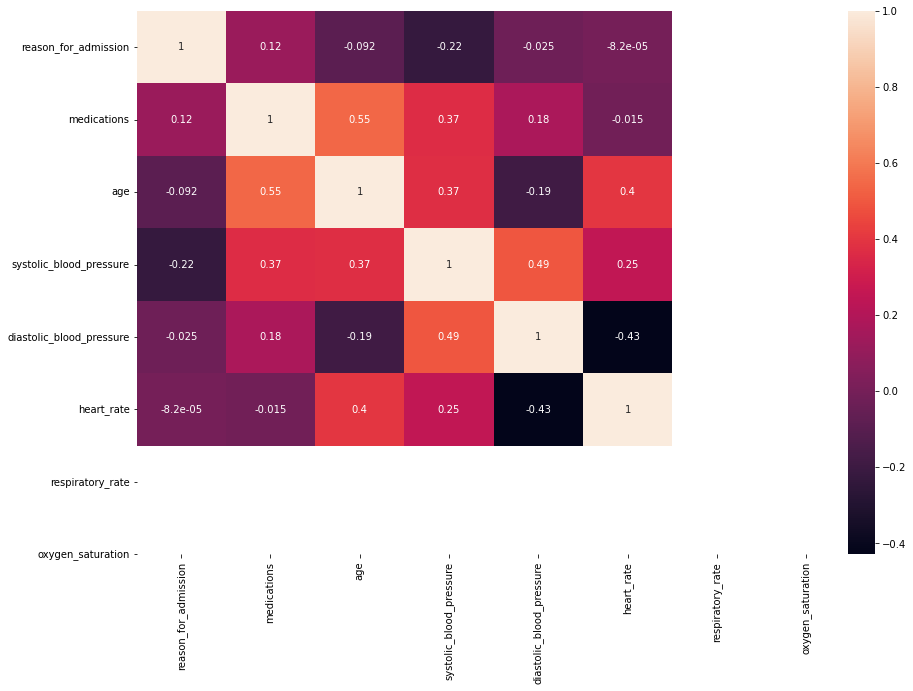

In [99]:
fig=plt.figure(figsize=(15,10))
heat_map=Patient[['reason_for_admission','medications','age','systolic_blood_pressure','diastolic_blood_pressure','heart_rate','respiratory_rate','oxygen_saturation',]].corr(method='pearson')
cols=['reason_for_admission','medications','age','systolic_blood_pressure','diastolic_blood_pressure','heart_rate','respiratory_rate','oxygen_saturation']
axis=sns.heatmap(heat_map, annot=True, xticklabels=cols, yticklabels=cols )

##### Getting Distributions:

In [100]:
Patient.describe()

,age,systolic_blood_pressure,diastolic_blood_pressure,heart_rate,respiratory_rate,oxygen_saturation
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,59.285714,126.666667,76.571429,97.761905,26.476190,92.380952
std,16.081489,19.885506,12.812382,26.929361,9.276956,10.897138
min,33.000000,87.000000,53.000000,41.000000,18.000000,47.000000
25%,47.000000,115.000000,68.000000,86.000000,20.000000,94.000000
50%,62.000000,125.000000,78.000000,102.000000,24.000000,95.000000
75%,74.000000,137.000000,82.000000,109.000000,28.000000,96.000000
max,81.000000,175.000000,101.000000,161.000000,55.000000,100.000000


<AxesSubplot:xlabel='heart_rate'>

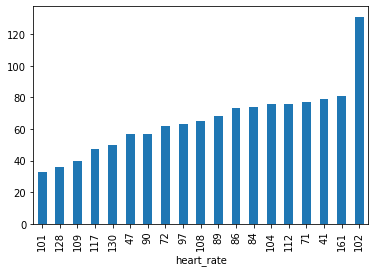

In [101]:
Patient.groupby('heart_rate')['age'].sum().sort_values().plot(kind='bar')

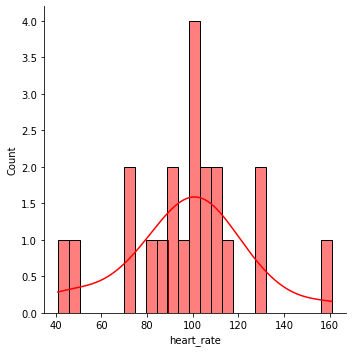

In [102]:
sns.displot(Patient.heart_rate,color='red', bins=25,kde=True)

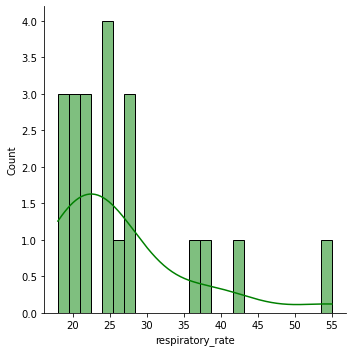

In [105]:
sns.displot(Patient.respiratory_rate ,color='green', bins=25,kde=True)

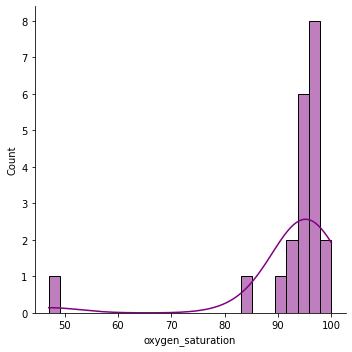

In [106]:
sns.displot(Patient['oxygen_saturation'],color='purple', bins=25,kde=True)

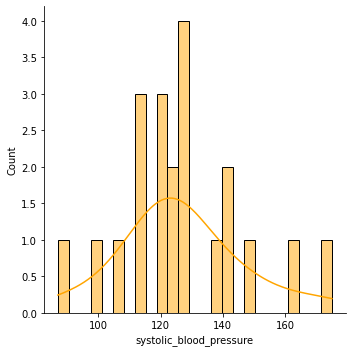

In [107]:
sns.displot(Patient['systolic_blood_pressure'],color='orange', bins=25,kde=True)

##### Forming a scattplot showcasing Age/Oxygen_Saturation in High_Chance_of_Afib vs Low_Chance_of_Afib.

In [108]:
High_Chance_of_Afib = Patient.query("heart_rate >= 60")
Low_Chance_of_Afib = Patient.query("heart_rate <= 60")

<AxesSubplot:xlabel='age', ylabel='oxygen_saturation'>

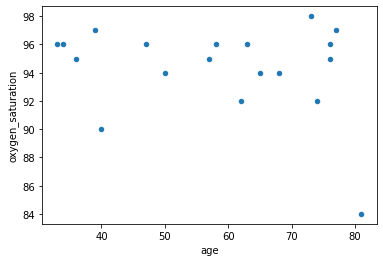

In [109]:
High_Chance_of_Afib.plot.scatter(x="age",y="oxygen_saturation")

<AxesSubplot:xlabel='age', ylabel='oxygen_saturation'>

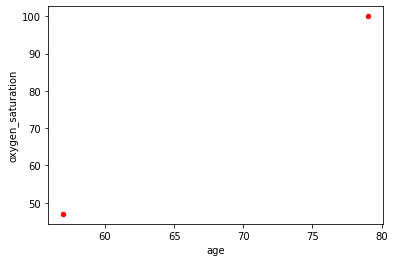

In [110]:
Low_Chance_of_Afib.plot.scatter(x="age",y="oxygen_saturation", color = 'red')

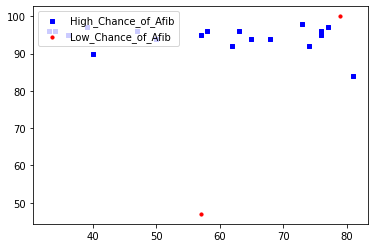

In [111]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)

ax1.scatter(High_Chance_of_Afib['age'], High_Chance_of_Afib['oxygen_saturation'],s=10, c='b', marker="s", label='High_Chance_of_Afib')
ax1.scatter(Low_Chance_of_Afib['age'],Low_Chance_of_Afib['oxygen_saturation'], s=10, c='r', marker="o", label='Low_Chance_of_Afib')
plt.legend(loc='upper left');
plt.show()

##### Scattplot of systolic_blood_pressure vs Heart_rate

<AxesSubplot:xlabel='systolic_blood_pressure', ylabel='heart_rate'>

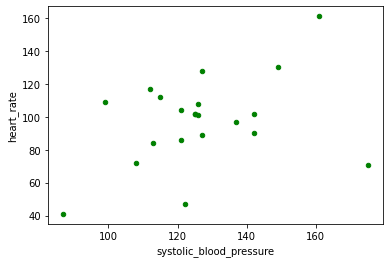

In [112]:
Patient.plot.scatter(x="systolic_blood_pressure",y="heart_rate", color="green")

##### Heart_Rate Boxplot

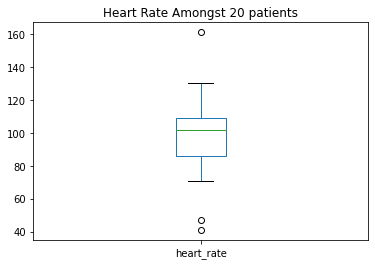

In [113]:
bxt = Patient.boxplot(column = 'heart_rate')
bxt.set_title('Heart Rate Amongst 20 patients')
bxt.grid(False)

##### Admission and comorbidities Bargraphs

In [114]:
Admission = Patient['reason_for_admission'].groupby(Patient['reason_for_admission']).count()
Admission

reason_for_admission
COVID-19 [U07.1]                                  11
Cough [R05]                                        1
Fever [R50.9]                                      1
Pneumonia [J18.9]                                  6
Pneumonia due to COVID-19 virus [U07.1, J12.8]     1
Shortness of breath [R06.0]                        1
Name: reason_for_admission, dtype: int64

<AxesSubplot:ylabel='reason for admission'>

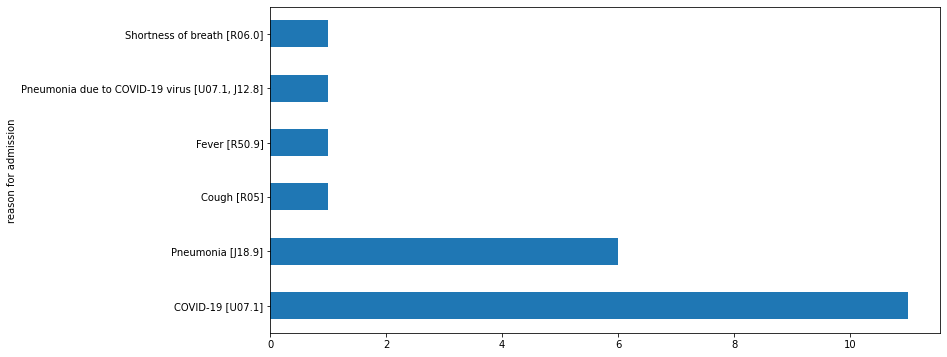

In [124]:
Admission.sort_values(ascending=False).plot(kind="barh",ylabel="Amount of Admissions",xlabel='reason for admission',figsize=(12,6))

In [118]:
Known_Illness = Patient['comorbidities'].groupby(Patient['comorbidities']).count()
Known_Illness

comorbidities
"[\"Asthma\",\"Other\"]"                                                                                                                         2
"[\"Chronic cardiac disease (not hypertension)\",\"Hypertension\",\"Asthma\",\"Obesity\",\"Diabetes\",\"Dementia [any etiology]\",\"Other\"]"    1
"[\"Chronic cardiac disease (not hypertension)\",\"Hypertension\",\"Diabetes\",\"Other\"]"                                                       1
"[\"Chronic cardiac disease (not hypertension)\",\"Hypertension\",\"Other\"]"                                                                    1
"[\"Hypertension\",\"Chronic pulmonary (lung) disease\",\"Asthma\",\"Diabetes\",\"Other\"]"                                                      1
"[\"Hypertension\",\"Chronic pulmonary (lung) disease\",\"Other\"]"                                                                              1
"[\"Hypertension\",\"Chronic renal\",\"Diabetes\",\"Other\"]"                                           

##### Known Illness besides Admission reason Pie Chart 

(<AxesSubplot:>, <matplotlib.legend.Legend at 0x7fb4e2e13b20>)

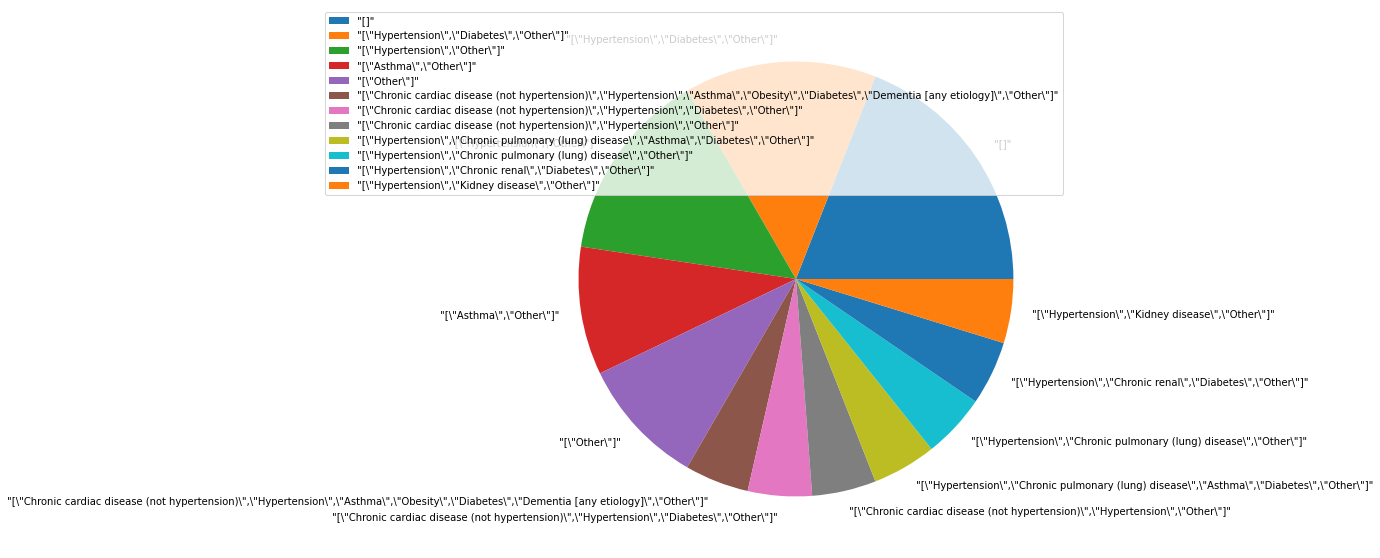

In [173]:
Known_Illness.sort_values(ascending=False).plot(kind="pie",ylabel="",xlabel='Illness',figsize=(20,10)),plt.legend(loc='best')

##### Pair Plot

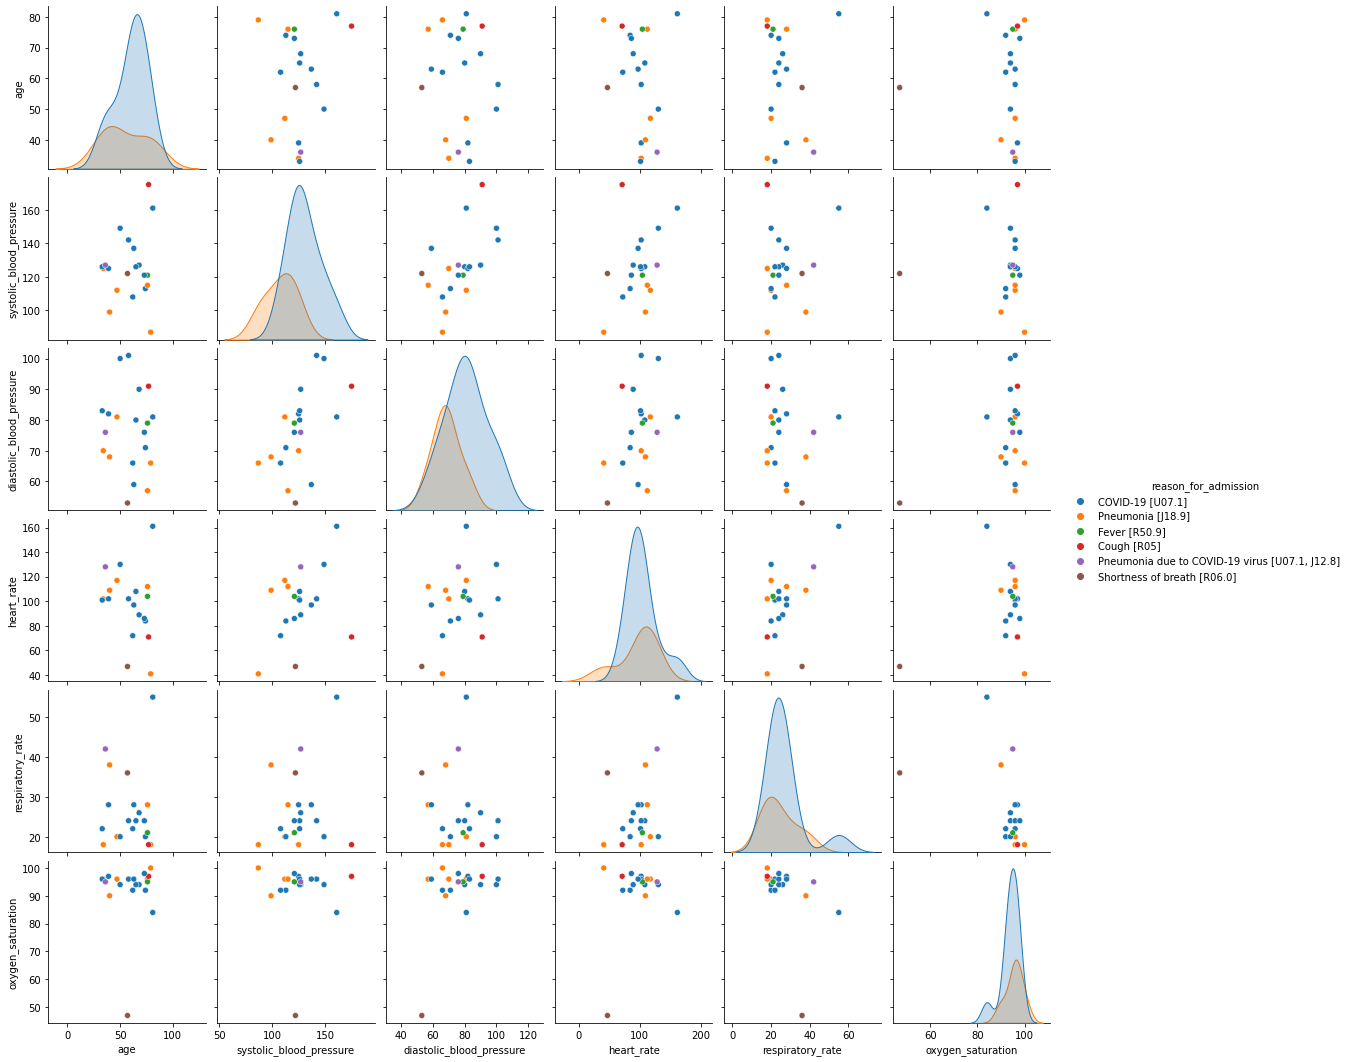

In [184]:
pair_plot=sns.pairplot(Patient[0:20], hue="reason_for_admission")

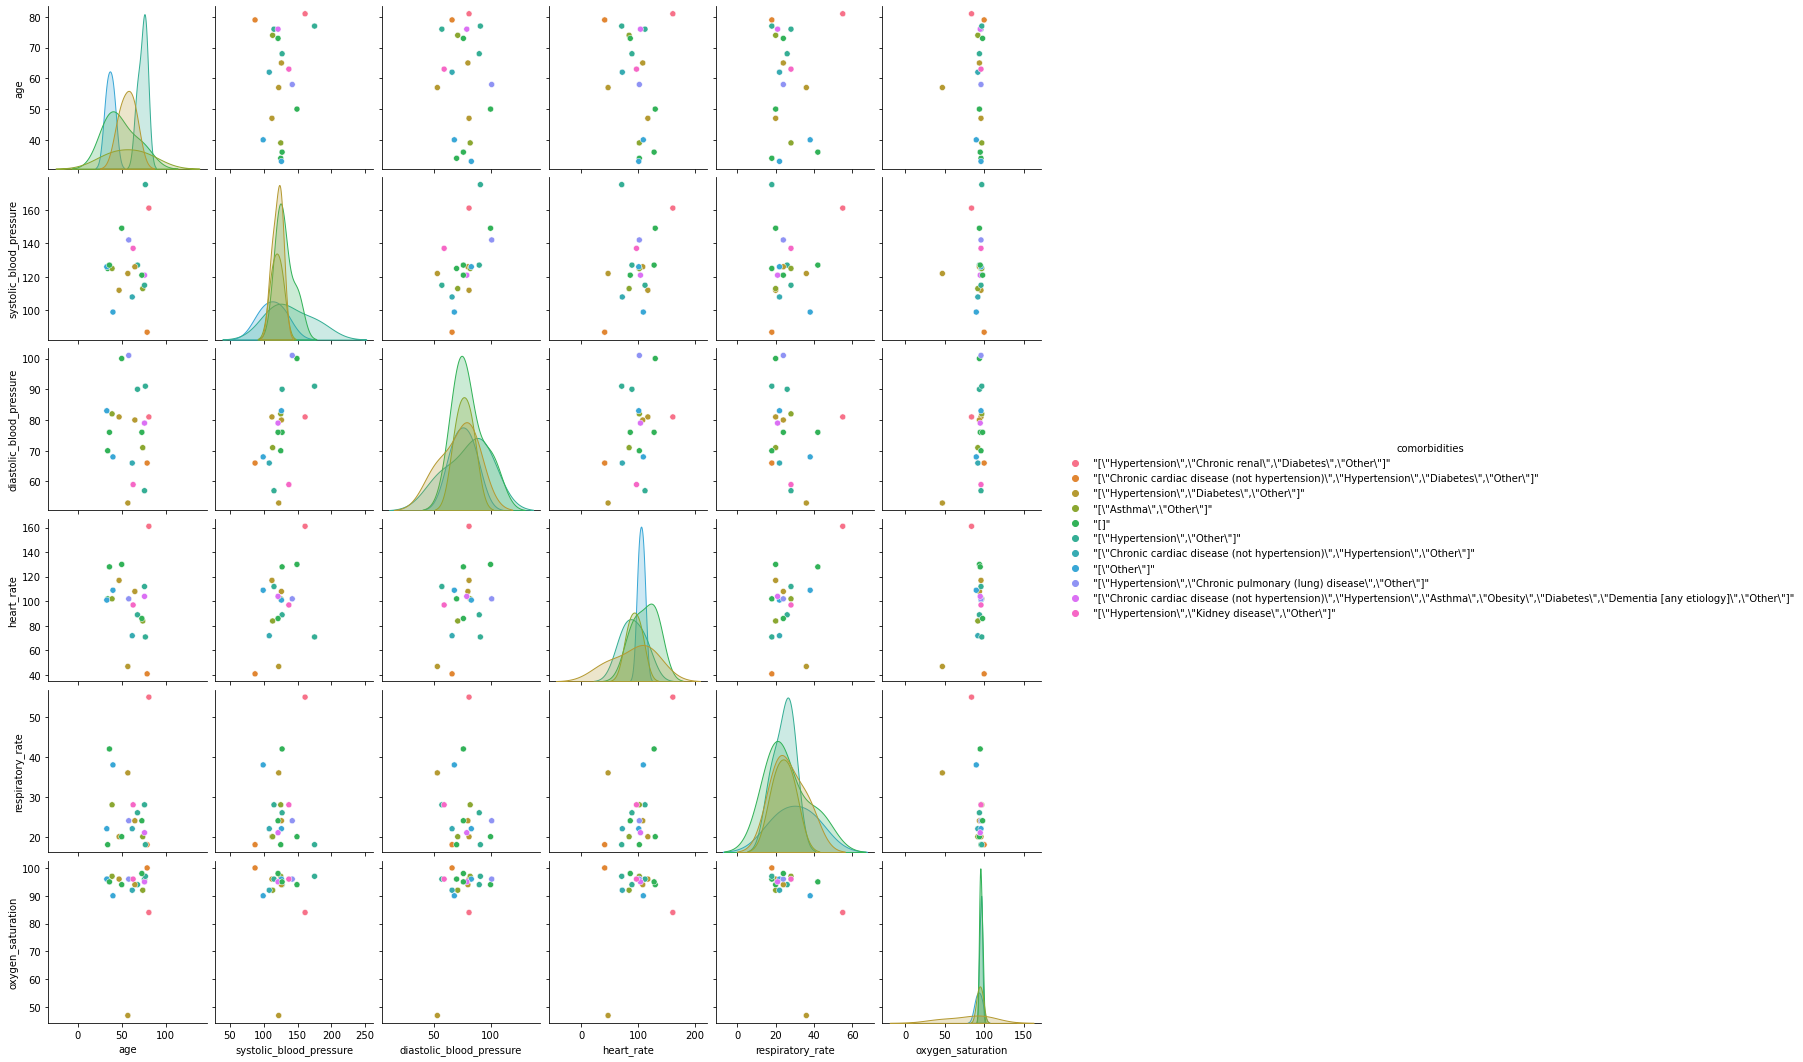

In [185]:
pair_plot=sns.pairplot(Patient[0:20], hue="comorbidities")